In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [3]:
#import data file
data1= pd.read_csv("202301-divvy-tripdata.csv")
data2= pd.read_csv("202302-divvy-tripdata.csv")
data3= pd.read_csv("202303-divvy-tripdata.csv")
data4= pd.read_csv("202304-divvy-tripdata.csv")
data5= pd.read_csv("202305-divvy-tripdata.csv")
data6= pd.read_csv("202306-divvy-tripdata.csv")
data7= pd.read_csv("202207-divvy-tripdata.csv")
data8= pd.read_csv("202208-divvy-tripdata.csv")
data9= pd.read_csv("202209-divvy-tripdata.csv")
data10= pd.read_csv("202210-divvy-tripdata.csv")
data11= pd.read_csv("202211-divvy-tripdata.csv")
data12= pd.read_csv("202212-divvy-tripdata.csv")

In [4]:
data = pd.concat((data1,data2,data3,data4,data5,data6,data7,data8,data9,data10,data11,data12), ignore_index=True)


In [5]:
#check data
data.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member,NaN
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual,NaN
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member,NaN


In [6]:
#drop columns which is not important for analysis
data.drop(['start_station_id','start_station_name','end_station_name','end_station_id'],axis=1,inplace=True)


In [7]:
data['ride_length']=pd.to_datetime(data['ended_at'])-pd.to_datetime(data['started_at'])

In [8]:
averageRideLength=pd.to_timedelta(data['ride_length']).mean()

In [9]:
#add new column
data['rideLength']=''
data['month']=''
data['day']=''
data['timing']=''


In [10]:
#calculate length of ride
data['rideLength']=pd.to_timedelta(data['ride_length']).astype('timedelta64[s]').astype(int)/3600


In [11]:
# retrieve month day and timing
data['month'] = pd.to_datetime(data['started_at']).dt.month

In [12]:
data['day'] = pd.to_datetime(data['started_at']).dt.day_name()

In [13]:
data['timing'] = pd.to_datetime(data['started_at']).dt.hour

In [14]:
# get season data according to month
data['season']=['winter' if x==1 or x==2 or x== 11 or x==12 
                else 'Spring' if x==3 or x==4 or x==5   
                else 'Summer' if x==6 or x==7 or x==8 
                else 'Fall' for x in data['month']]

In [15]:
# get month's name according to month
data['month']=['JAN' if x==1 else 'FEB' if x==2 else 'MAR' if x== 3 else 'APR' if x==4 else 'MAY' if x==5 
               else 'JUN' if x==6 else 'JUL' if x== 7 else 'AUG' if x==8 else 'SEP' if x==9 else 
               'OCT' if x==10 else 'NOV' if x==11 else 'DEC'  for x in data['month']]

In [16]:
#average Ride timing by rider in minutes
import math
round(averageRideLength.total_seconds()/60)

18

In [17]:
# Total rides
data['ride_length'].count()

5779444

In [18]:
groupBYmembers=data.groupby('member_casual')

Text(0, 0.5, 'No. of Rides')

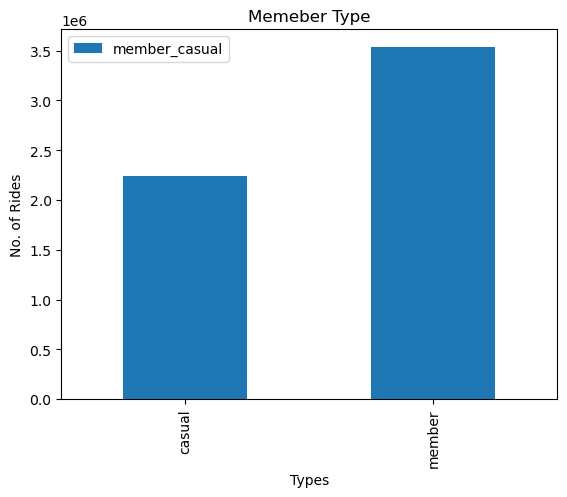

In [19]:
a=groupBYmembers[['member_casual']].count()
a.plot(kind='bar')
plt.title('Memeber Type')
plt.xlabel('Types')
plt.ylabel('No. of Rides')

In [20]:
groupBYbikes=data.groupby('rideable_type')

In [21]:
groupBYbikes['rideable_type'].count()

rideable_type
classic_bike     2495320
docked_bike       141535
electric_bike    3142589
Name: rideable_type, dtype: int64

In [22]:
# Bikes used by each members
groupByMembersAndBikes= data.groupby(['member_casual','rideable_type'])['ride_id']
groupByMembersAndBikes.count()

member_casual  rideable_type
casual         classic_bike      804367
               docked_bike       141535
               electric_bike    1298350
member         classic_bike     1690953
               electric_bike    1844239
Name: ride_id, dtype: int64

In [23]:
# number of hours different bikes drive by different members
groupByMembersAndBikes= data.groupby(['member_casual','rideable_type'])['rideLength']
groupByMembersAndBikes.sum().apply(np.ceil)

member_casual  rideable_type
casual         classic_bike     382766.0
               docked_bike      329321.0
               electric_bike    325099.0
member         classic_bike     386981.0
               electric_bike    342444.0
Name: rideLength, dtype: float64

In [24]:
# rides per month 
groupByRidesAndmonths= data.groupby(['month'])['ride_id']
groupByRidesAndmonths.count()


month
APR    426590
AUG    785932
DEC    181806
FEB    190445
JAN    190301
JUL    823488
JUN    719618
MAR    258678
MAY    604827
NOV    337735
OCT    558685
SEP    701339
Name: ride_id, dtype: int64

In [25]:
#rides per day
groupByDay= data.groupby(['day'])['ride_id']
groupByDay.count()

day
Friday       865994
Monday       730712
Saturday     924388
Sunday       739351
Thursday     863962
Tuesday      806146
Wednesday    848891
Name: ride_id, dtype: int64

In [26]:
#rides per hour of a day
groupByTime= data.groupby(['timing'])['member_casual']
groupByTime.count()

timing
0      79815
1      50649
2      30230
3      18150
4      15894
5      45064
6     131860
7     238457
8     299667
9     229140
10    235042
11    286942
12    333248
13    339959
14    350673
15    410468
16    510676
17    588065
18    486371
19    356428
20    252513
21    206212
22    167030
23    116891
Name: member_casual, dtype: int64

In [27]:
groupBySeasons= data.groupby(['season'])['ride_id']
groupBySeasons.count()


season
Fall      1260024
Spring    1290095
Summer    2329038
winter     900287
Name: ride_id, dtype: int64

In [28]:
data.to_csv('Data.csv')